In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import utils
import IPython.display as ipd

In [2]:
data_np = np.load("./data/training/Scale.npy")
data_np_t= data_np.transpose() # first dimension is used to describe different data
data = torch.from_numpy(data_np_t)
import librosa
# hack solution- this should be loaded from some output file instead...
_, sr = librosa.load("./data/training/Scale.m4a")

/home/yasu/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


define dimensions for each layer

In [3]:
input_shape = data.shape[1]
hidden1_d = 500
hidden2_d = 100
latent_d = 10
print(f"{input_shape} -> {hidden1_d} -> {hidden2_d} -> {latent_d}")

1025 -> 500 -> 100 -> 10


define AutoEncoder model

In [4]:
ae_model = nn.Sequential(
    ## encoder
    nn.Linear(in_features=input_shape, out_features=hidden1_d),
    nn.ReLU(),
    nn.Linear(in_features=hidden1_d, out_features=hidden2_d),
    nn.ReLU(),
    nn.Linear(in_features=hidden2_d, out_features=latent_d),
    nn.ReLU(),
    ## decoder
    nn.Linear(in_features=latent_d, out_features=hidden2_d),
    nn.ReLU(),
    nn.Linear(in_features=hidden2_d, out_features=hidden1_d),
    nn.ReLU(),
    nn.Linear(in_features=hidden1_d, out_features=input_shape),
    nn.ReLU()
)

Plot initial output of the autoencoder (which will of course be gibberish)

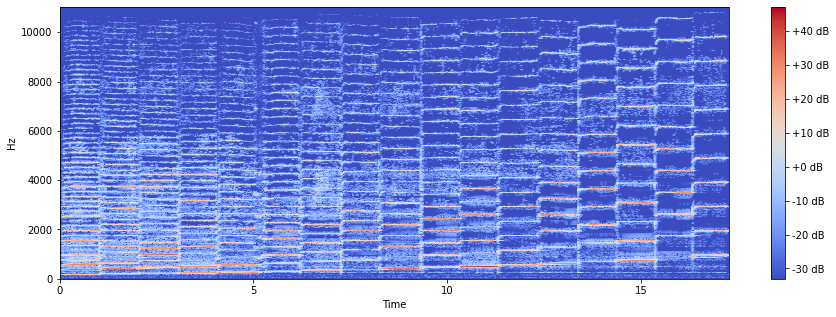

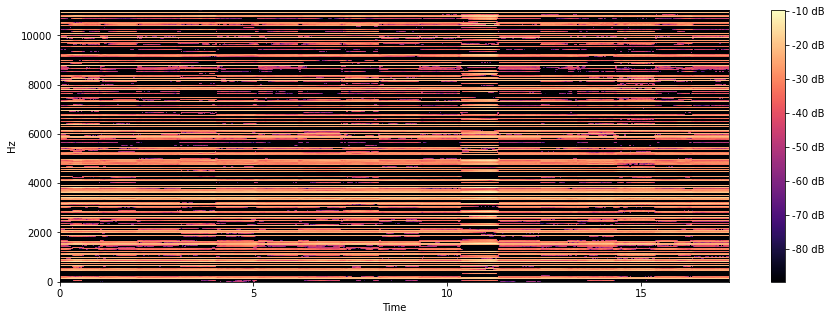

In [5]:
utils.plot_stft(data_np, sr)

initial_output = ae_model(data)
initial_output_np = initial_output.detach().numpy().transpose()
utils.plot_stft(initial_output_np, sr)

Horror sounds!

In [6]:
reconstructed_audio = utils.stft2audio(initial_output_np)
ipd.Audio(reconstructed_audio, rate=sr)

Just for fun, try it on the test data too

In [7]:
utils.test_ae_with_audio(["Brandenburg", "Canon in D"], ae_model)

playing Brandenburg...


/home/yasu/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Input audio:
samples:	248019
sampling rate:	22050
duration:	11.248027210884354
----------
Resulting STFT:
samples:	485
frequency is split into 1025 parts.


playing Canon in D...


/home/yasu/.local/lib/python3.8/site-packages/librosa/core/audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


Input audio:
samples:	501612
sampling rate:	22050
duration:	22.748843537414967
----------
Resulting STFT:
samples:	980
frequency is split into 1025 parts.
